Import Necessary Libraries

In [3]:
import pandas as pd 
import os

Merging 12 months of data into a single file.

In [ ]:
df = pd.concat(map(pd.read_csv, ['Sales_January_2019.csv','Sales_February_2019.csv','Sales_March_2019.csv','Sales_April_2019.csv','Sales_May_2019.csv','Sales_June_2019.csv','Sales_July_2019.csv','Sales_August_2019.csv','Sales_September_2019.csv','Sales_October_2019.csv','Sales_November_2019.csv','Sales_December_2019.csv']), ignore_index=True)
print(df)
# My way of doing

In [6]:
files = [file for file in os.listdir('./All_data')]
# Making an empty DataFrame
all_data_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./All_data/'+file)
    all_data_df = pd.concat([all_data_df, df])

all_data_df.head()
all_data_df.to_csv("all_data.csv", index=False)

Read in All Data from updated dataframe

In [160]:
all_data = pd.read_csv('all_data.csv')
org_data = all_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


What is the best month for sales? How much was earned that mont?

In [161]:
# earned money per sale = Quantity * price each 
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


Cleaning the Data:

In [163]:
# dropping NAN DFs
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
# 'any' drops every row where there is NAN
# 'all' drops the rows where 

In [166]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# all_data['Sale_PD'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data['Sale PD'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [169]:
# Method 1: all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce') BETTER METHOD
# Method 2
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')

results = all_data.groupby('Month').sum()

all_data.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale PD
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


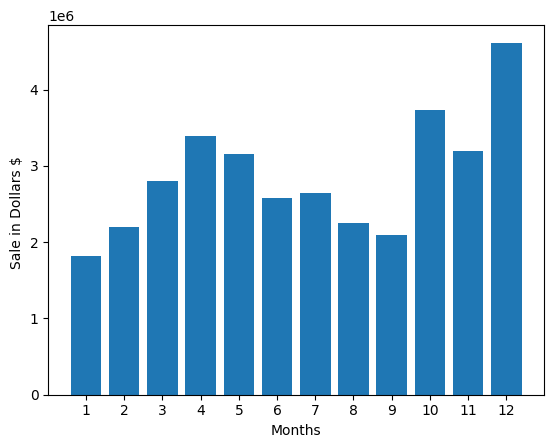

In [172]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, all_data.groupby(['Month']).sum()['Sale PD'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel(('Sale in Dollars $ '))
plt.show()


What City Has the highest number of the sales!!??

In [173]:
# Disect the address coulumn

all_data['tot_city'] = all_data['Purchase Address'].str.split(',')
all_data['tot_city'].head()

all_data['city'] = all_data['tot_city'].str[1]
all_data['city'].head()

0          Dallas
2          Boston
3     Los Angeles
4     Los Angeles
5     Los Angeles
Name: city, dtype: object

In [174]:
# Easier way to do the above!!

# We can use .apply() bny that we can easily run any function on the given function making it easier.

all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# all_data.head()
all_data = all_data.drop(columns='tot_city')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [175]:
# To Remove DUplicates city (city with same names) we will take into consideration of the state Code
# Mehod 2 to use lambda function
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1] +' '+ get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


Other Ways to represent the above cell:

using F stirngs
all_data['city'] = all_data['Purchase Address'].apply(lambda x:f{"{x.split(',')[1]} ({get_state(x)})"})


In [176]:
results = all_data.groupby('city').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD
city,,,,,,,,
Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


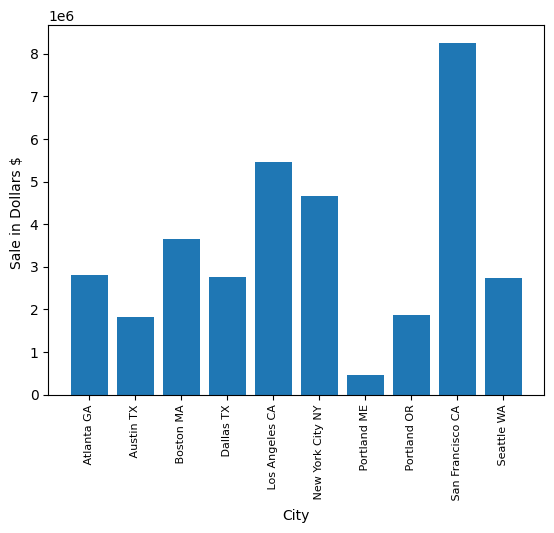

In [178]:
# cities = all_data['city'].unique(), Doesnt work as the ordersing changes. (for ore info use googel!)
# Groupby groups similar items together

cities = [city for city, df in all_data.groupby('city')]

plt.bar(cities, results['Sale PD'])
plt.xticks(cities, rotation = 'vertical', size =8)
plt.xlabel('City')
plt.ylabel(('Sale in Dollars $ '))
plt.show()

At What time should we display advertisments to maximize the likely hood of customer's buying porduct??

In [179]:
all_data['peak_time'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1].split(':')[0])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD,city,peak_time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,09


In [180]:
results = all_data.groupby('peak_time').sum()
results


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD,city
peak_time,,,,,,,,,
00,1765751765801766101766671766761766841767681768...,AAA Batteries (4-pack)USB-C Charging CableAAA ...,4428,709296.70,04/27/19 00:3004/05/19 00:3504/26/19 00:4004/1...,"433 Hill St, New York City, NY 10001886 Willow...",27554,713721.27,New York City NY Los Angeles CA Dallas TX Los...
01,1766481767371768091769071769911770371771711771...,27in FHD MonitorApple Airpods HeadphonesBose S...,2619,458490.00,04/24/19 01:1704/07/19 01:2804/19/19 01:1404/1...,"732 2nd St, Portland, OR 97035109 Center St, L...",16657,460866.88,Portland OR Los Angeles CA San Francisco CA L...
02,1766441768181769451770821772141772541772541774...,USB-C Charging CableWired HeadphonesUSB-C Char...,1398,233833.64,04/23/19 02:0904/09/19 02:1904/24/19 02:1704/1...,"962 7th St, Los Angeles, CA 90001642 13th St, ...",8507,234851.44,Los Angeles CA San Francisco CA Austin TX Sea...
03,1769781775011778311780771782881787171794551794...,Apple Airpods HeadphonesWired HeadphonesLightn...,928,144726.42,05/01/19 03:2904/10/19 03:4304/01/19 03:0904/0...,"589 Lake St, Portland, OR 97035888 14th St, Se...",5904,145757.89,Portland OR Seattle WA San Francisco CA San F...
04,1765881766281767881776871779061780941783771786...,20in MonitorLightning Charging CableBose Sound...,937,162058.18,04/02/19 04:0004/15/19 04:0304/15/19 04:3904/0...,"765 Cherry St, Seattle, WA 98101628 Wilson St,...",6148,162661.01,Seattle WA Dallas TX New York City NY San Fra...
05,1766301767121768191768731769761770751771021771...,Google PhoneGoogle PhoneAA Batteries (4-pack)A...,1493,229621.21,04/10/19 05:0104/20/19 05:2104/15/19 05:4404/0...,"770 Maple St, San Francisco, CA 94016910 Washi...",9301,230679.82,San Francisco CA San Francisco CA Portland OR...
06,1766821769001769431769441770421770491770681770...,Lightning Charging CableBose SoundSport Headph...,2810,445000.11,04/27/19 06:1904/21/19 06:1704/09/19 06:5004/2...,"593 Adams St, Boston, MA 02215356 North St, Bo...",17539,448113.00,Boston MA Boston MA San Francisco CA Austin T...
07,1765631765911766031766461767281767491767811767...,Bose SoundSport HeadphonesApple Airpods Headph...,4556,740568.11,04/02/19 07:4604/21/19 07:2104/01/19 07:4604/2...,"668 Center St, Seattle, WA 98101600 Maple St, ...",28850,744854.12,Seattle WA Austin TX San Francisco CA Portlan...
08,1765581766171766341766381766491766581766731767...,USB-C Charging CableApple Airpods HeadphonesLi...,7002,1185970.62,04/19/19 08:4604/25/19 08:0304/10/19 08:0004/2...,"917 1st St, Dallas, TX 75001319 8th St, Portla...",43626,1192348.97,Dallas TX Portland OR Atlanta GA Boston MA Sa...


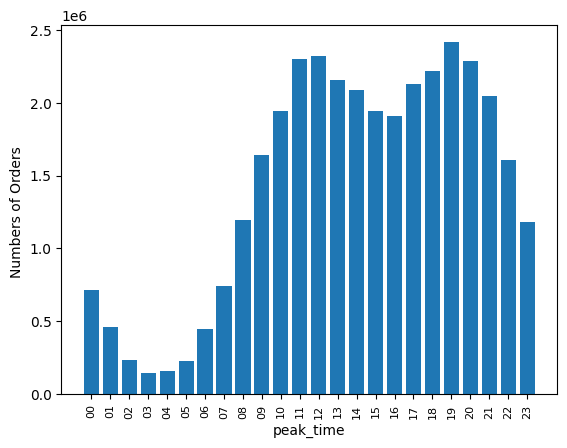

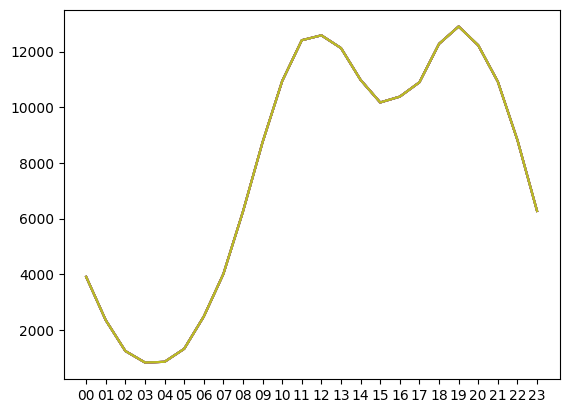

In [181]:
timerel = [city for city, df in all_data.groupby('peak_time')]

plt.bar(timerel, results['Sale PD'])
plt.xticks(timerel, rotation = 'vertical', size =8)
plt.xlabel('peak_time')
plt.ylabel(('Numbers of Orders '))
plt.show()
plt.plot(timerel, all_data.groupby(['peak_time']).count())


In [182]:
# Method 2
org_data = all_data
# all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# all_data['Hour'] = all_data['Order Date'].dt.hour
# all_data['Minute'] = all_data['Order Date'].dt.minute
# all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD,city,peak_time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,09


In [183]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1

C:\Users\tathy\AppData\Local\Temp\ipykernel_12508\2125136625.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


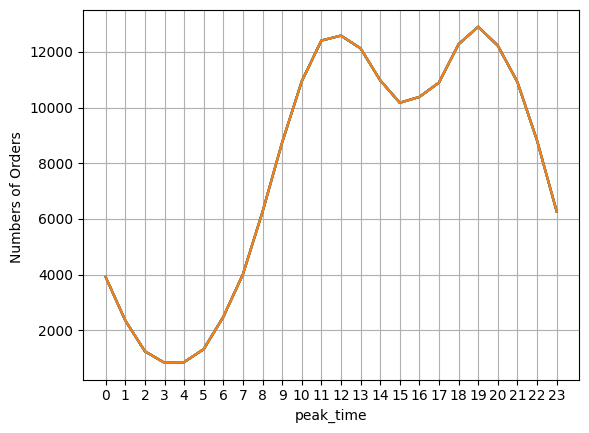

In [184]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('peak_time')
plt.ylabel(('Numbers of Orders '))
plt.grid()
plt.show()


What Products are most often sold together??

In [185]:
# Hint: Products that are sold together have the same order ID
df =  all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale PD,city,peak_time,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,11,31,1


Key Hint: If you don't know what a function does, you can use 'cntrl' + 'r click' to access the function!

In [186]:
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
# The transform() method allows you to execute a function for each value of the DataFrame.
# apply() method. This function acts as a map() function in Python.
df2 = df[['Order ID', 'grouped']].drop_duplicates()
# What this means is that apply(~) allows you perform operations on columns, rows and the entire DataFrame of each group, 
# whereas transform(~) is restricted to operations on individual columns of each group.
# df.head()

C:\Users\tathy\AppData\Local\Temp\ipykernel_12508\504084582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [187]:
# Droping duplicated Orders

df = df[['Order ID', 'grouped']].drop_duplicates()
df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [188]:
from itertools import combinations
from collections import Counter
# itertools: a collection of tools intended to be fast and use memory efficiently when handling iterators (like lists or dictionaries)
# collections: 

count = Counter()
# Counter() Stores list data in key value(number of occurrecnes) pair use cntrl click

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    # what the above line is doing is: Making combination of 2-2 words(using combinations())
    # that means ex: iphone, cable, headphone is present it will make 3c2 combinations! and store those in dictionary using Counter()

for key, value in count.most_common(10):
    print(key, value)




('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Final Question: What Product Sold the most? and why do you think it sold the most?

In [191]:
# Equation for most sold is: product * quantity ordred

# Method 2:
# product_grp = all_data.groupby('Product')
# quantity_ordered = product_grp[['Quantity Ordered']].sum()
# quantity_ordered.head()

all_data = all_data.drop(['Order Date'], axis=1) #Was giving type error so we droped it
product_grp = all_data.groupby('Product')
quantity_ordered = product_grp.sum()['Quantity Ordered']
quantity_ordered.head()
# all_data.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

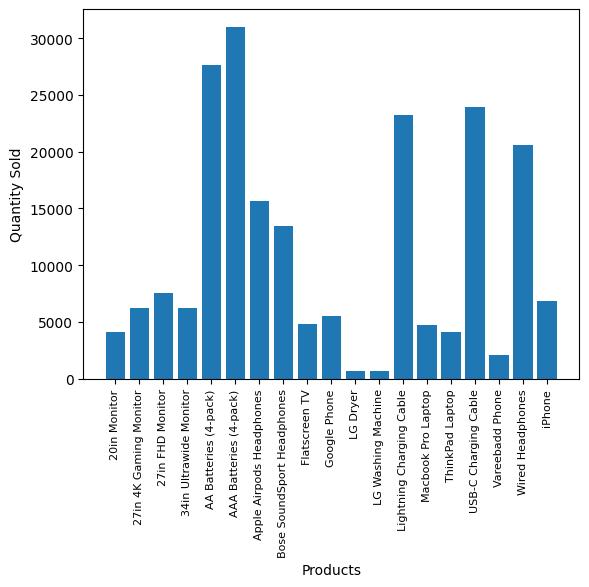

In [192]:
produ_sal = [product for product, df in product_grp]

plt.bar(produ_sal, quantity_ordered)
plt.xticks(produ_sal, rotation = 'vertical', size =8)
plt.xlabel('Products')
plt.ylabel(('Quantity Sold'))
plt.show()

In [193]:
all_data.head()
# Part 2 ot the QUESTION

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sale PD,city,peak_time,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,08,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,22,30,1
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,14,38,1
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,14,38,1
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,09,9,27,1


In [200]:
# all_data = all_data.drop(['Purchase Address', 'city'], axis=1)
prices = all_data
# prices = prices.drop(['Purchase Address', 'city'], axis=1)
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Month,Sale PD,peak_time,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,4,23.90,08,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,4,99.99,22,22,30,1
3,176560,Google Phone,1,600.00,4,600.00,14,14,38,1
4,176560,Wired Headphones,1,11.99,4,11.99,14,14,38,1
5,176561,Wired Headphones,1,11.99,4,11.99,09,9,27,1


C:\Users\tathy\AppData\Local\Temp\ipykernel_12508\3979311718.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(produ_sal, rotation='vertical', size=8)
C:\Users\tathy\AppData\Local\Temp\ipykernel_12508\3979311718.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


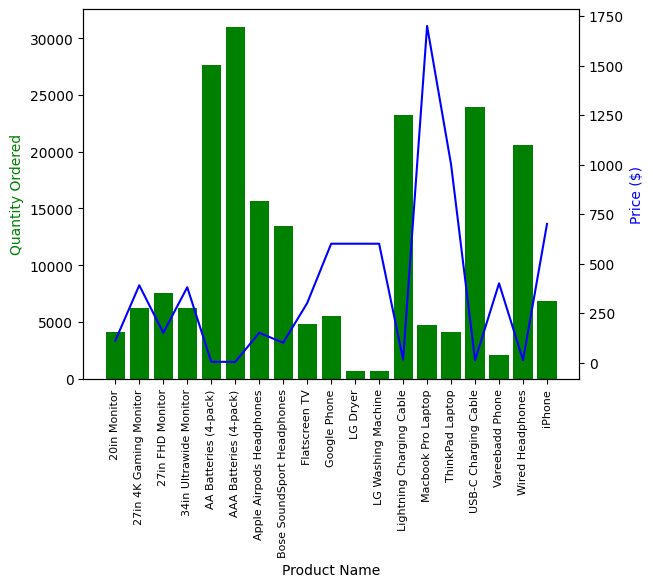

In [201]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(produ_sal, quantity_ordered, color='g')
ax2.plot(produ_sal, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(produ_sal, rotation='vertical', size=8)

fig.show()